In [2]:
import torch 
from torch import nn, optim
import torchvision 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import math 
import numpy as np
%matplotlib inline 

In [3]:
#device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
device = torch.device('cpu')

In [4]:
num_epochs = 10 
num_classes = 10 # 0 - 9
learning_rate = 0.0005 
input_size = 28 * 28 
batch_size = 50
hidden_sizes = [128, 64] # arbitrary choice 

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [6]:
train_data = datasets.MNIST('./', download=True, train=True, transform=transform)
test_data = datasets.MNIST('./', download=True, train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False , num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
checkdata = iter(train_loader)
img, label = next(checkdata)
print(img.shape, label.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


4
1
6
7
1
5
2
0
3


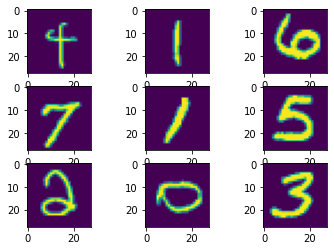

In [8]:
for i in range(1,10):
    print(label[i].item())
    plt.subplot(3, 3, i)
    plt.imshow(img[i][0]) #, cmap = "gray_r")    
plt.show()

In [9]:
class DigitRecognizer(nn.Module):

    def __init__(self, input_size, hidden_layers, num_classes):
        super(DigitRecognizer, self).__init__()
        self.input = nn.Linear(input_size, hidden_sizes[0])
        self.relu_0 = nn.ReLU()
        self.hidden1 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu_1 = nn.ReLU()
        self.output = nn.Linear(hidden_sizes[1], num_classes)
        
    def forward(self, X):
        model = self.input(X)
        model = self.relu_0(model)
        model = self.hidden1(model)
        model = self.relu_1(model)
        model = self.output(model)
        return model 

model = DigitRecognizer(input_size, hidden_sizes, num_classes)      
repr(model)

'DigitRecognizer(\n  (input): Linear(in_features=784, out_features=128, bias=True)\n  (relu_0): ReLU()\n  (hidden1): Linear(in_features=128, out_features=64, bias=True)\n  (relu_1): ReLU()\n  (output): Linear(in_features=64, out_features=10, bias=True)\n)'

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [11]:
samples = len(train_loader)
samples # seeing size of training samples

1200

In [12]:
model = model.to(device) # putting the model in the GPU

In [13]:
for epoch in range(1, num_epochs + 1):
    for step, (images, labels) in enumerate(train_loader, start = 1): # batch training loop 
        images = images.reshape(-1, 784).to(device) # flattening image to # of input nodes

        # passing data to be computed in the GPU 
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)

        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
          print("Epoch: {}/{}, step {}/ {}, loss: {:4f}".format(epoch, num_epochs, step, samples, loss.item()))

Epoch: 1/10, step 100/ 1200, loss: 0.669373
Epoch: 1/10, step 200/ 1200, loss: 0.490165
Epoch: 1/10, step 300/ 1200, loss: 0.309353
Epoch: 1/10, step 400/ 1200, loss: 0.483252
Epoch: 1/10, step 500/ 1200, loss: 0.329451
Epoch: 1/10, step 600/ 1200, loss: 0.175163
Epoch: 1/10, step 700/ 1200, loss: 0.278525
Epoch: 1/10, step 800/ 1200, loss: 0.248053
Epoch: 1/10, step 900/ 1200, loss: 0.392618
Epoch: 1/10, step 1000/ 1200, loss: 0.222862
Epoch: 1/10, step 1100/ 1200, loss: 0.325902
Epoch: 1/10, step 1200/ 1200, loss: 0.461347
Epoch: 2/10, step 100/ 1200, loss: 0.151888
Epoch: 2/10, step 200/ 1200, loss: 0.251654
Epoch: 2/10, step 300/ 1200, loss: 0.230280
Epoch: 2/10, step 400/ 1200, loss: 0.144789
Epoch: 2/10, step 500/ 1200, loss: 0.288203
Epoch: 2/10, step 600/ 1200, loss: 0.233577
Epoch: 2/10, step 700/ 1200, loss: 0.106262
Epoch: 2/10, step 800/ 1200, loss: 0.155746
Epoch: 2/10, step 900/ 1200, loss: 0.235334
Epoch: 2/10, step 1000/ 1200, loss: 0.323576
Epoch: 2/10, step 1100/ 1200

In [14]:
# Assessing accuracy of model
#model.eval()

correct = 0
for (images, labels) in test_loader: # batch training loop 
    images = images.reshape(-1, 784).to(device) # flattening image to # of input nodes

    # passing data to be computed in the GPU 
    images = images.to(device) # 64 images
    labels = labels.to(device) # 64 true values
    
    outputs = model(images) 

    _, test_predicted = torch.max(outputs.data,1)


    correct += torch.eq(labels, test_predicted).sum()

accuracy = (correct/len(test_data)).item() * 100 
print("Model has {:.2f} % accuracy".format(accuracy))


Model has 97.67 % accuracy
